# Machine Learning
## Data Science and Managment

## About Me
- **Name:** Anna Mpanti
- **Contact:** ampanti@luiss.it

---

## Office Hours
- **When:** Mondays 12.30 PM - 2.00 PM
- **Where:** Webex/Teachers room (Via Lisbona 7)
- **Note:** Please make sure to send me an email in advance to schedule an appointment, and I will inform you about the exact office’s number and location (via Lisbona 5b).

---

## Course Materials
- Lecture notes, assignments, and additional resources will be provided on the course website.

---

If you have any questions or need assistance, don't hesitate to ask

# Today's topic
- Problem and objective setting
- Data exploration
- "Human" regression
- "Machine learning" regression

In [11]:
import typing

# Importing necessary libraries for numerical computations and data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing modules for file handling and web requests
import os
import requests

In [12]:
# Loading a dataset
file_id = '1XUwVCKYht3nrUAgq2uEiClZ3MfxKrNkZ'
url = f'https://drive.google.com/uc?id={file_id}'
fuel_df = pd.read_csv(url)
path = 'https://drive.google.com/file/d/1XUwVCKYht3nrUAgq2uEiClZ3MfxKrNkZ/view?usp=sharing'

# Loading a dataset localy: 

# fuel_df = pd.read_csv("Fuel_Consumption_Ratings.csv")


This dataset provides detailed information about fuel consumption ratings for various cars.

In [13]:
display(fuel_df.head())

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


# Objective of the Regression Analysis
Our primary objective is to develop a regression model that **predicts the fuel consumption of cars based on various attributes**. This involves analyzing a dataset containing car features (e.g., engine size, model, vehicle class) and their corresponding fuel consumption values. By using regression techniques, we aim to identify relationships between these attributes and accurately estimate fuel consumption for new or unseen data.

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) helps us to understand, clean, and gain insights from our dataset. Here's a structured EDA process to guide your data exploration:
* **Understand Column Meanings**: Begin by comprehending the meaning of each column in your dataset. Knowing the significance of each attribute gives context to your analysis.
* **Check Data Integrity**: Ensure the integrity of your dataset by inspecting for missing values (NaNs) and outliers. Addressing data quality issues is crucial to reliable analysis.
* **Visualize Distributions**: Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.
* **Pair Plots for Relationships**: Create pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.


## Quick data exploration
1. Understand columns' meaning
2. Check for NaNs
3. Check distributions
4. Check correlations

## Understand columns' meaning

In [14]:
fuel_df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


* **Model Year**: The year of the vehicle's model
* **Make**: The brand or manufacturer of the vehicle. This typically refers to the company that produced the vehicle (e.g., Ford, Toyota).
* **Model**: The specific model name or number given to the vehicle by the manufacturer.
* **Vehicle Class**: The category or type of vehicle
* **Engine Size (L)**: This is a measure of the total volume of all the cylinders in the engine in liters (L)
* **Cylinders**: The number of cylinders in the vehicle's engine.
* **Transmission**: The type of transmission used in the vehicle.
* **Fuel Type**: The type of fuel the vehicle uses (e.g., gasoline, diesel, electric).
* **Fuel Consumption (City (L/100 km))**: The average fuel consumption of the vehicle in city driving, measured in liters per 100 kilometers.
* **Fuel Consumption (Hwy (L/100 km))**: The same, but in highway driving.
* **Fuel Consumption (Comb (L/100 km))**: The combined average fuel consumption of the vehicle (both city and highway), measured in liters per 100 kilometers.
* **Fuel Consumption (Comb (mpg))**: The combined average fuel consumption of the vehicle, measured in miles per gallon (mpg). 🇺🇸
* **CO2 Emissions (g/km)**: The amount of carbon dioxide emissions the vehicle produces, measured in grams per kilometer
* **CO2 Rating**: A rating given to the vehicle based on its CO2 emissions.
* **Smog Rating**: A rating given to the vehicle based on its contribution to air pollution (smog).

One advantage of stopping to look at the meaning of the columns without jumping directly to the regression is that it allows us to create an idea about **what the relationships between the features might be**.
For example, one might expect that more cylinders mean more power to the vehicle, but at the expense of efficiency.
So here is where a prerogative of the data scientist is to have some expertise in the field where someone works.

Don't worry, you don't have to be a mechanical engineer for this lesson, but you can use your knowledge to get a feel for the problem.

## Check for NaNs

In [15]:
print("The dataset has a shape of", fuel_df.shape, '\n')
display(fuel_df.isna().sum())

The dataset has a shape of (946, 15) 



Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

Understanding the extent of missing data helps us in understanding the data quality.

## Missingno


<Axes: >

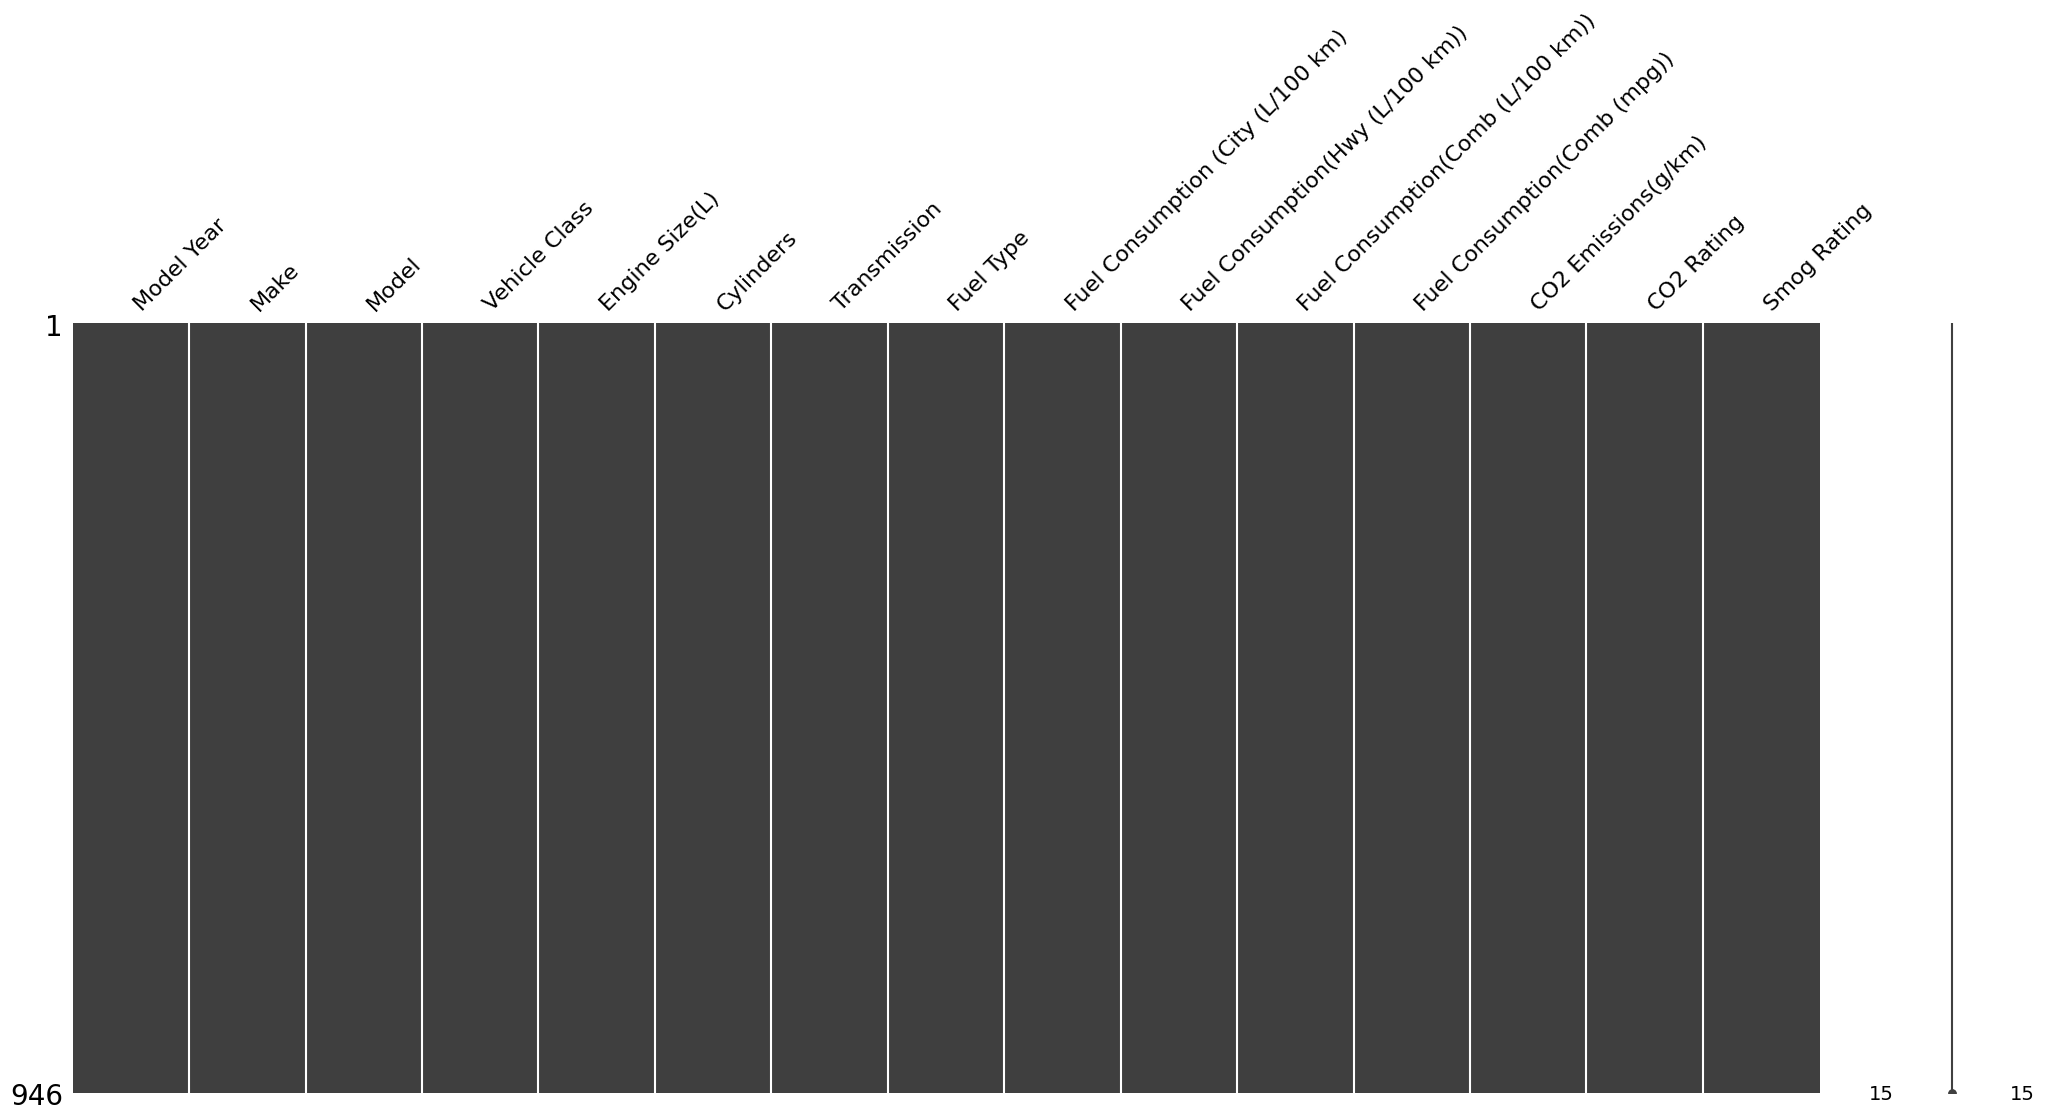

In [16]:
import missingno as msno

msno.matrix(fuel_df)

<Axes: >

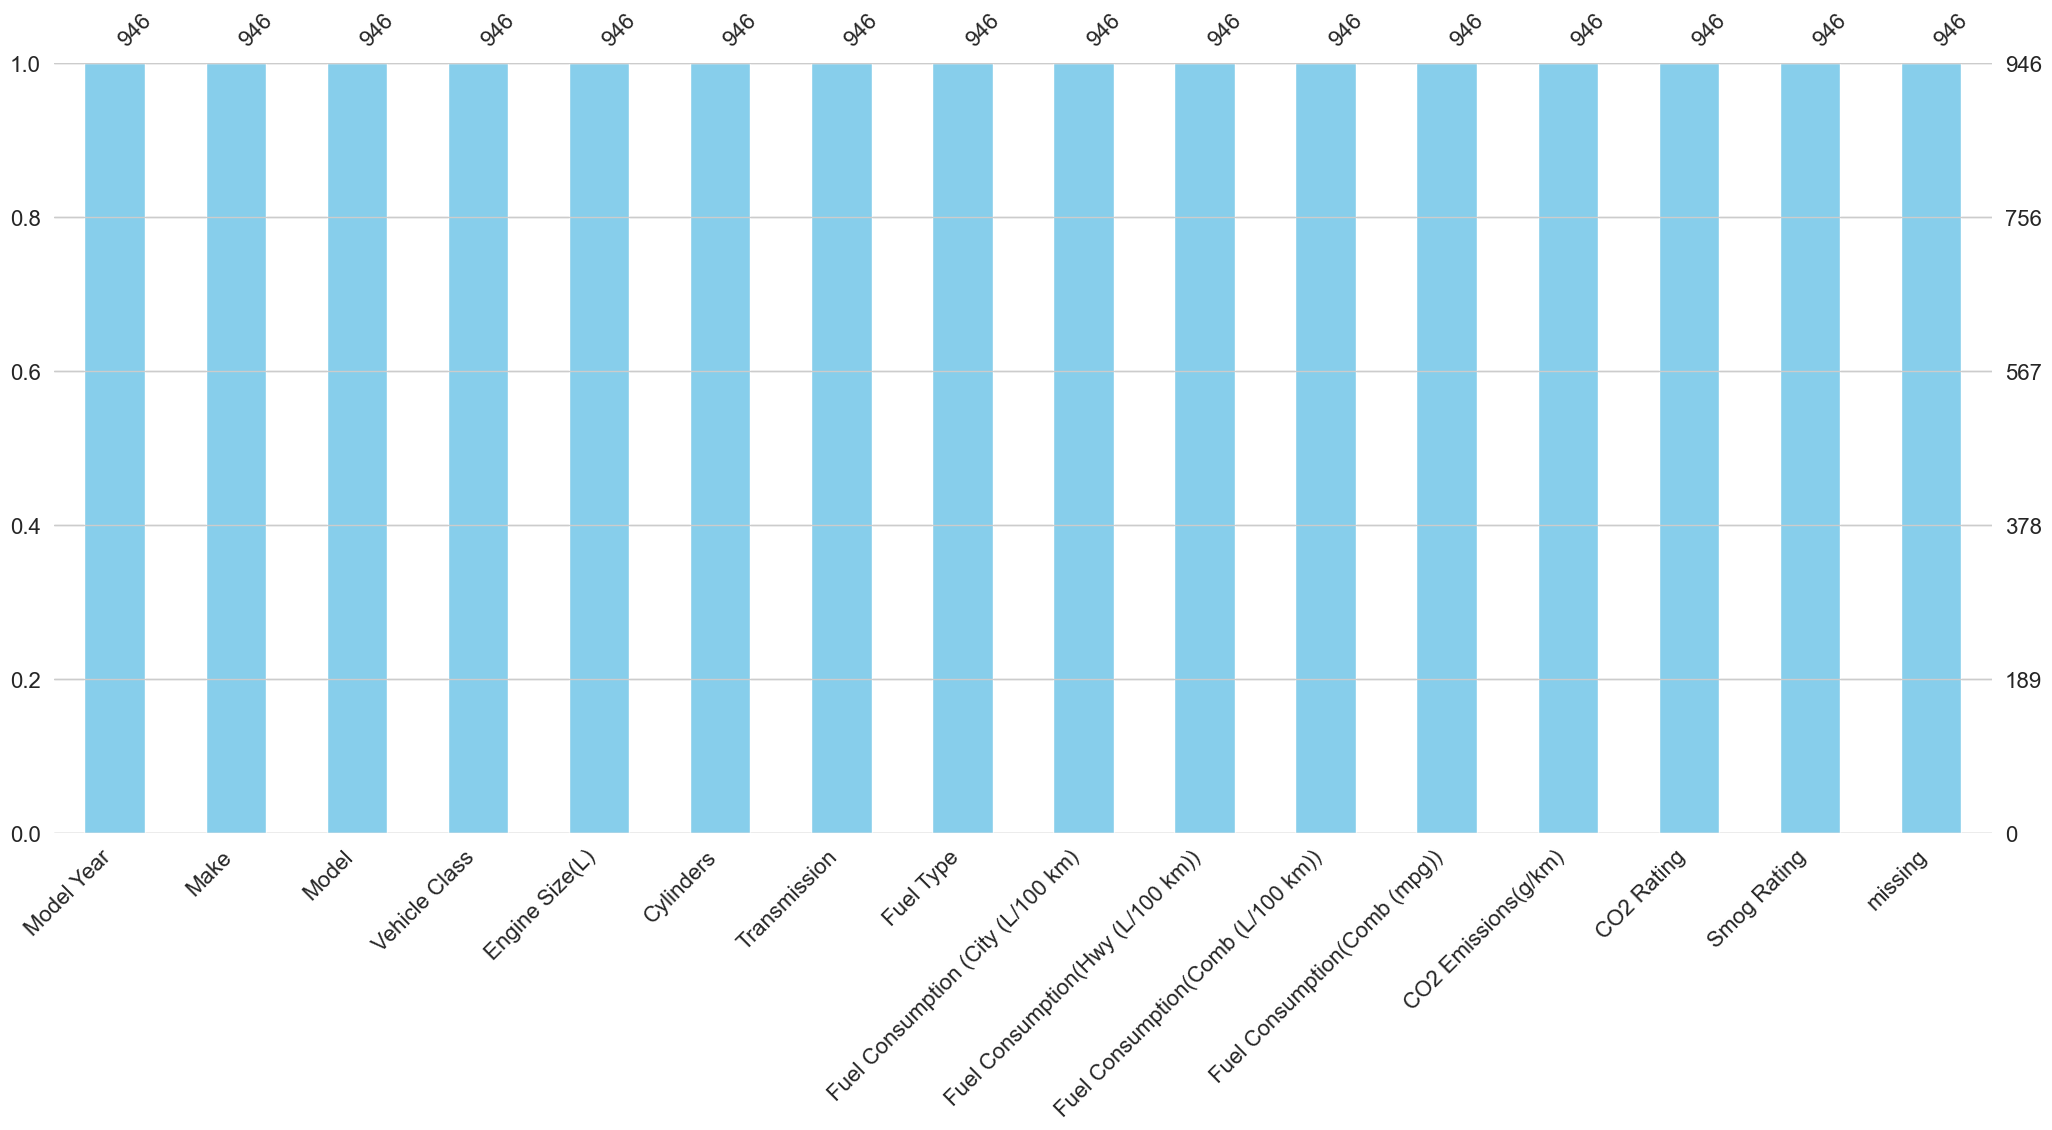

In [31]:
msno.bar(fuel_df, color='skyblue' ,labels=True)

In [18]:
#msno.heatmap(fuel_df, cmap='YlGnBu', labels=True)

## Check distributions

In [19]:
fuel_df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


This already tells a lot about how data is distributed, but we can do more by plotting the actual distribution of the columns we are interested in.

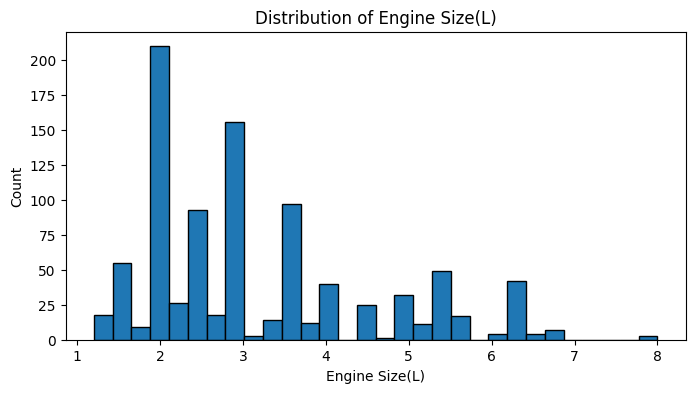

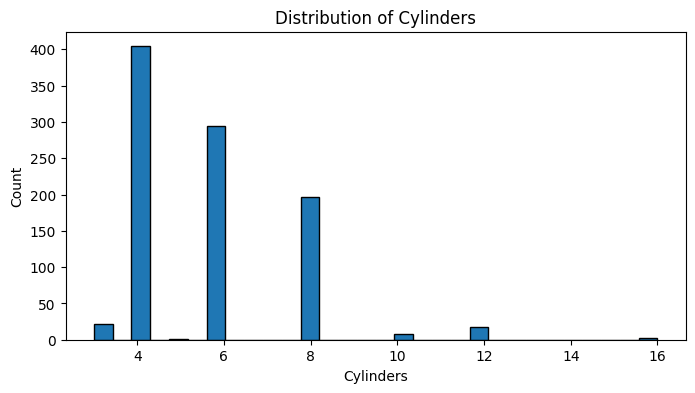

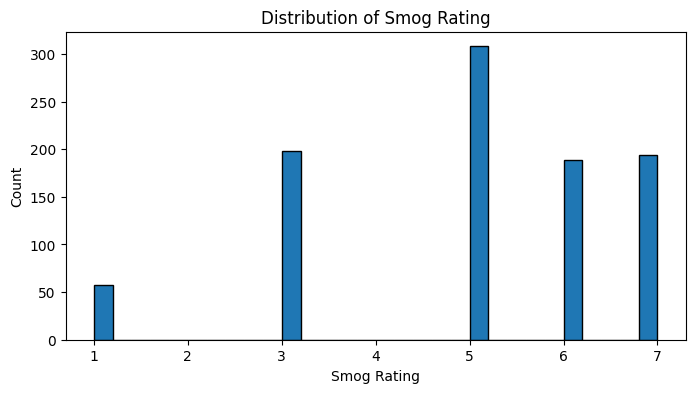

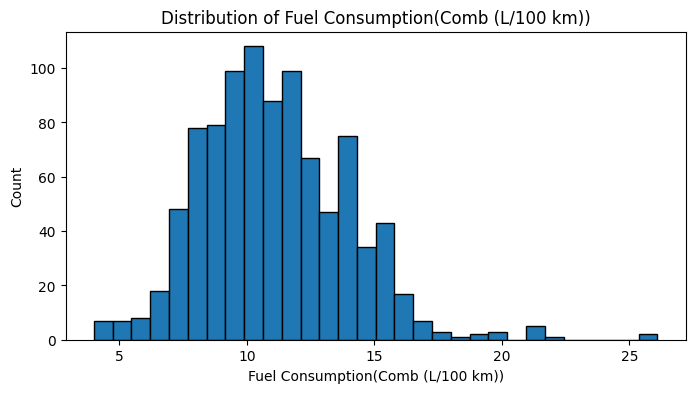

In [ ]:
# Set the columns
display_columns = ['Engine Size(L)', 'Cylinders', 'Smog Rating', 'Fuel Consumption(Comb (L/100 km))']

# For each numerical column
for column in display_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(fuel_df[column], bins=30, edgecolor='black')
    #sns.histplot(fuel_df[column], bins=30, edgecolor='black', kde=True) <- this is how you would do it with seaborn
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

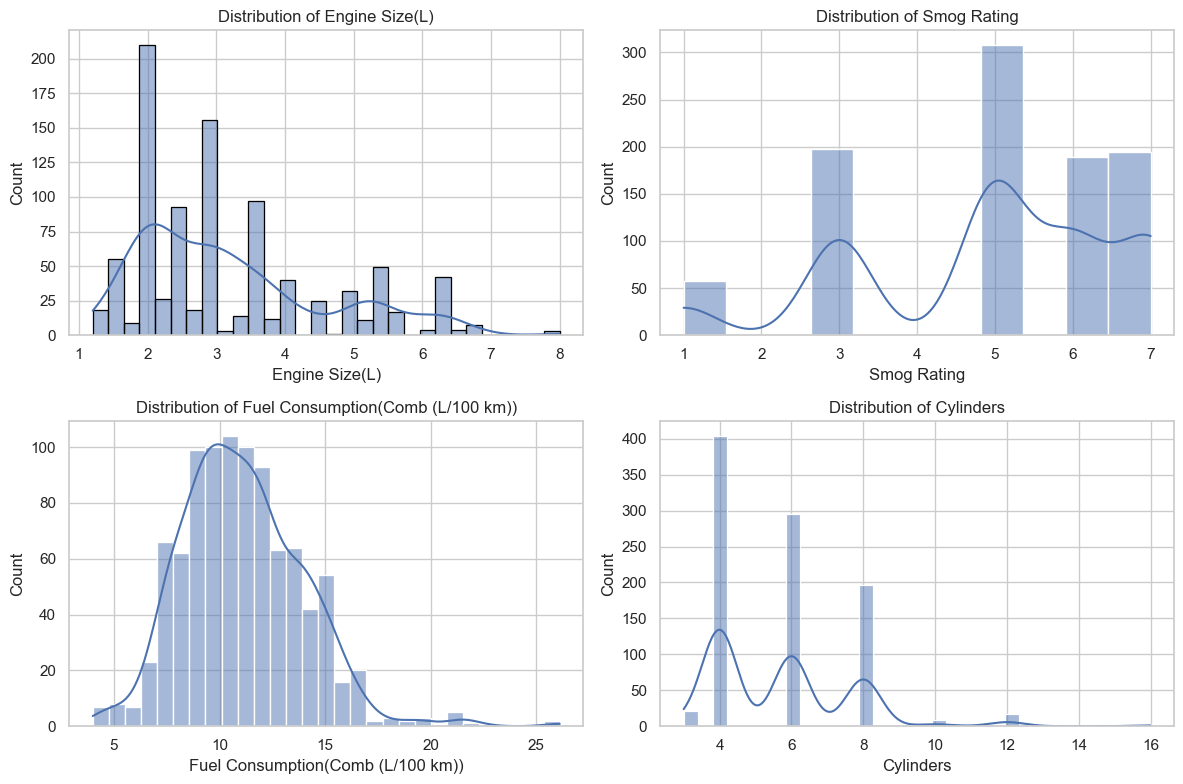

In [ ]:
#Seaborn
# Set the style
sns.set(style="whitegrid")#"darkgrid", "whitegrid", "dark", "white", "ticks"

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Engine Size Distribution Plot
sns.histplot(fuel_df['Engine Size(L)'], bins=30, edgecolor='black', kde=True, ax=axes[0, 0]) # "kde = True" draws the line / "ax" sets the position in the grid where the graph will be
axes[0, 0].set_title("Distribution of Engine Size(L)")

# Smog Rating Distribution Plot
# Removed hue parameter as it's not suitable for wide-form data
sns.histplot(fuel_df['Smog Rating'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Smog Rating")

# Fuel Consumption Distribution Plot
# Removed hue parameter as it's not suitable for wide-form data
sns.histplot(fuel_df['Fuel Consumption(Comb (L/100 km))'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Fuel Consumption(Comb (L/100 km))")

# Cylinders Distribution Plot
sns.histplot(fuel_df['Cylinders'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Cylinders")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

This process is not only about identifying whether the data are balanced or conforming to known distributions, such as Gaussian or power distributions, but also about a deeper level of understanding.

By examining the columns, we grasp **what** has been measured – the specific attributes and metrics in our dataset. Moving to the distribution plots, we then uncover **how** these measurements are distributed and 'how much' variation exists.

## Check correlations

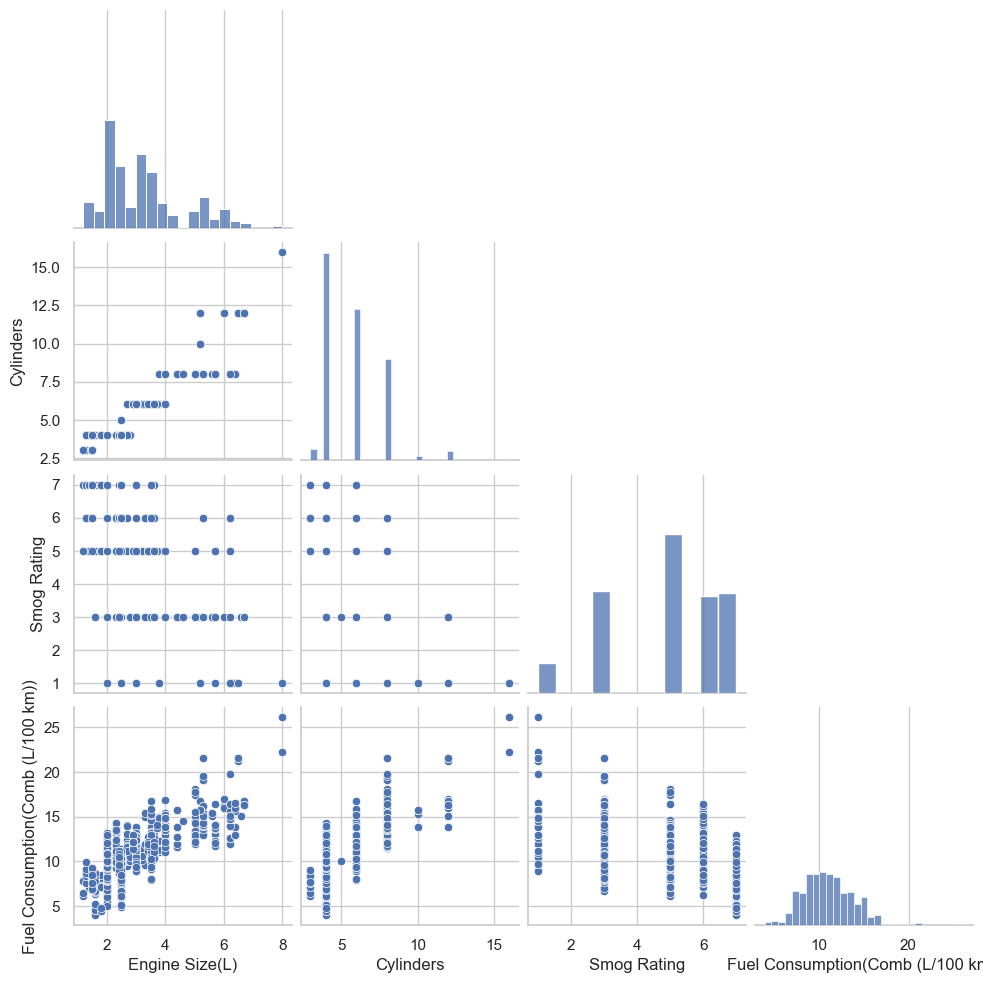

In [22]:
# Plotting all the relationship between continuous variables.
display_columns = ['Engine Size(L)', 'Cylinders', 'Smog Rating', 'Fuel Consumption(Comb (L/100 km))']

sns.pairplot(fuel_df[display_columns], corner = True, kind = 'scatter')

#sns.pairplot(fuel_df.drop(['Model Year'], axis=1), corner = True)

<Axes: >

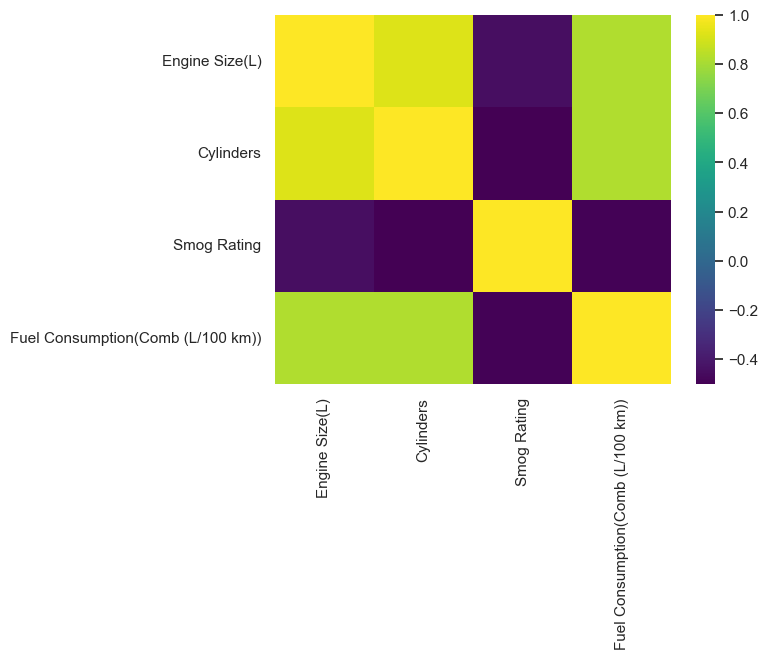

In [23]:
#sns.heatmap(fuel_df.corr())
sns.heatmap(fuel_df[display_columns].corr(numeric_only = True), cmap = 'viridis') #,annot=True

Pair plots are an efficient way to understand the relationships between variables. But remember:

***Correlation is not causation***

While pair plots can show a strong relationship between variables, such as a positive or negative trend, it's important to remember that:

- Correlation only quantifies the strength of a linear relationship: A strong correlation does not imply that one variable directly influences or causes changes in the other.
- Confounding Variables: There may be underlying factors influencing both variables, leading to a spurious relationship.
- Non-linear Relationships: Pair plots may not capture complex non-linear interactions without additional analysis.

***Example Scenario***

A pair plot might reveal:

- A strong negative correlation between Engine Size and Fuel Efficiency.
- A positive relationship between Car Weight and Engine Size. However, this does not imply that increasing engine size directly causes lower fuel efficiency—it could depend on other factors like aerodynamics, tire type, or road conditions.



***Example Scenario***

Imagine you're analyzing a dataset with features such as Margarine Consumption per Capita and Divorce Rate in Maine. A pair plot or a similar visualization like the one above might reveal an apparent strong correlation between these two variables over time. Specifically, as margarine consumption decreases, the divorce rate also seems to decrease.

However, this example underscores a critical concept:

- Correlation is not causation: While the two variables appear to move together, there is no logical or causal link between them. It is highly unlikely that reducing margarine consumption has any direct impact on divorce rates, or vice versa.

- Confounding Variables: The relationship might exist due to other factors, such as societal or economic trends during that time period, which independently influenced both divorce rates and margarine consumption.

- Overinterpretation: Without further analysis or context, such as statistical tests or domain expertise, it's essential to avoid drawing any real-world conclusions from this data.

<img src = 'https://lh6.googleusercontent.com/_4Y1UH0TAn5Fr69V1LzP5vzmJ8td9WmQHevXycNX5i_MhYZOmOp5_XAcsIIwOxCVSMlkJvCMrJmcLi5WHVSw8uGQEqf3IXp8Lb2Cf3LjewcjpJmhF746yYb2qlyeSqN7VEf8TLa2'>

# Linear regression

## Visualizing Relationships

Before building a linear regression model, it's essential to visualize the relationship between the predictor (**independent**) variable and the target (**dependent**) variable. This helps determine whether a linear relationship exists and provides insights into the strength and direction of the correlation.

In this case, we are exploring the relationship between **Engine Size (L)** and **Fuel Consumption (L/100 km)**. Engine size represents the independent variable, while fuel consumption serves as the dependent variable. By plotting these variables using a scatter plot, we can visually inspect their relationship and assess if linear regression is a suitable modeling technique.

The following code generates a scatter plot for these variables:

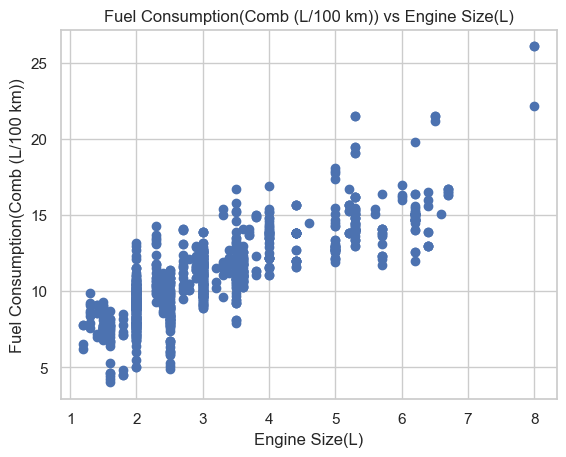

In [24]:
# Define columns
var_1 = 'Engine Size(L)'
var_2 = 'Fuel Consumption(Comb (L/100 km))'

# Define figures
fig, ax = plt.subplots()
# Plot columns
plt.scatter(fuel_df[var_1], fuel_df[var_2])
# Set figure
plt.title(f'{var_2} vs {var_1}')
ax.set_xlabel(f'{var_1}')
ax.set_ylabel(f'{var_2}')
plt.show()


Looks like the fuel consuption is **linearly dependent** to the engine size. What does "linearly dependent" mean?

A function in the form:

$f(x) = m x + q$

describes a line as function of $x$. It depends on two variables: $m$ (the slope) and $q$ (the intercept).
The goal of our regression will be to evaluate which are the best $m$ and $q$.

[Let's explore this function](https://www.desmos.com/calculator?lang=it)

Let's find them by "brute-forcing" trying them.

This simple experiment demonstrates that we can use our own eyes to visually determine a good fit. However, we are still missing a crucial point: among all the parameter choices, which one is the best?

To answer this, we need a quantitative measure of how well our fit represents the data.

How can we compare different fits? A natural approach is to evaluate the average distance between the data points and the fitted line. This measure is known as the Mean Absolute Error (MAE).

Let's calculate it and see how well our fit performs!

In [25]:
#interactive linear regression plot
from ipywidgets import interact

# Define columns
var_1 = 'Engine Size(L)'
var_2 = 'Fuel Consumption(Comb (L/100 km))'
X, y = fuel_df[var_1], fuel_df[var_2]
def plot_regression(m,q):
  # Define figures
  plt.figure(figsize=(10, 6))
  # Plot columns
  plt.scatter(X, y, color='blue', label='Data points')
  # Set figure
  plt.title(f'{var_2} vs {var_1}')
  plt.xlabel(f'{var_1}')
  plt.ylabel(f'{var_2}')

  x = np.arange(0,11,10)
  plt.plot(x, m * x + q, color = 'red', label = 'Regression')
  plt.ylim(0,30)
  plt.grid()
  plt.show()

interact(plot_regression, m = (0,10,0.5), q = (0,5,0.5))

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
def MAE(x, y_real, m, q):
  y = lambda x: m * x + q #Defines a linear function
  mean_absolute_error = np.mean(np.abs(y(x) - y_real)) #Computes the absolute error between the predicted and real val
  return mean_absolute_error #Returns the average absolute error

def plot_regression_MAE(m,q):
  # Define figures
  plt.figure(figsize=(10, 6))
  # Plot columns
  plt.scatter(X, y, color='blue', label='Data points')
  # Set figure
  str_mae = f'MAE: {MAE(X,y,m,q):.4}'

  plt.title(f'{var_2} vs {var_1} /// {str_mae}')
  plt.xlabel(f'{var_1}')
  plt.ylabel(f'{var_2}')

  t = np.arange(0,11,10)
  plt.plot(t, m * t + q, color = 'red', label = 'Regression')
  plt.ylim(0,30)
  plt.grid()
  plt.show()

interact(plot_regression_MAE, m = (0,10,0.5), q = (0,5,0.5))


interactive(children=(FloatSlider(value=5.0, description='m', max=10.0, step=0.5), FloatSlider(value=2.0, desc…

<function __main__.plot_regression_MAE(m, q)>

Now, we encounter a challenge: when conducting a regression analysis, we essentially measure how much the Fuel Consumption is influenced by the Engine Size.

In this context, the intercept (q) can be thought of as representing an additional variable or a baseline level of consumption. To address this, we can apply **a min-max normalization** to the data. This transformation scales the data to fit within a 0 to 1 range. By doing so, we not only facilitate the interpretation of the intercept but also **standardize** the scale of our variables, making the regression analysis more straightforward and meaningful.

In [ ]:
def min_max(col):
  min = col.min()
  max = col.max()
  return (col - min) / (max - min)

col = fuel_df[var_1]
print('Before')
display(col.describe())
print('After')
display(min_max(col).describe())

X = min_max(fuel_df[var_1])
y = min_max(fuel_df[var_2])
def plot_regression_MAE_norm(m,q):
  # Define figures
  plt.figure(figsize=(10, 6))
  # Plot columns
  plt.scatter(X, y, color='blue', label='Data points')
  # Set figure
  str_mae = f'MAE: {MAE(X,y,m,q):.4}'

  plt.title(f'{var_2} vs {var_1} /// {str_mae}')
  plt.xlabel(f'{var_1}')
  plt.ylabel(f'{var_2}')

  t = np.arange(0,11,10)
  plt.plot(t, m * t + q, color = 'red', label = 'Regression')
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.grid()
  plt.show()
interact(plot_regression_MAE_norm, m = (0,1,0.01), q = (0,1,0.1))


Before


,Engine Size(L)
count,946.000000
mean,3.198732
std,1.374814
min,1.200000
25%,2.000000
50%,3.000000
75%,3.800000
max,8.000000


After


,Engine Size(L)
count,946.000000
mean,0.293931
std,0.202179
min,0.000000
25%,0.117647
50%,0.264706
75%,0.382353
max,1.000000


interactive(children=(FloatSlider(value=0.0, description='m', max=1.0, step=0.01), FloatSlider(value=0.0, desc…

<function __main__.plot_regression_MAE_norm(m, q)>

Right now, we have many possible parameters that fits the curve, but luckily we got rid of a whole set of them (the $q$). Intuitively, to make a good regression we should find the minimum of our MAE (or in general of our *loss function*) as function of the parameters.


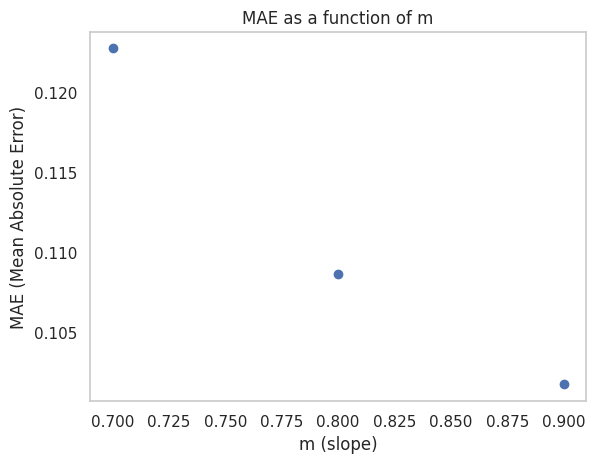

In [ ]:
m_values = [0.7, 0.8, 0.9]
plt.scatter(m_values, [MAE(X, y, m, 0) for m in m_values])

plt.xlabel("m (slope)")
plt.ylabel("MAE (Mean Absolute Error)")
plt.title("MAE as a function of m")

plt.grid()
plt.show()